# **About dataset**

This dataset is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
Output variable (based on sensory data):
12. quality (score between 0 and 10)

Our goal is to make a **machine learning** model that can predict the quality of wine based on the input variable (features) given above.

# **Viewing and understanding the basic details of our dataset**

In [1]:
#importing libraries that are used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix as CM

In [2]:
#importing dataset
dataset = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.shape

(1599, 12)

In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From above data description we can conclude that value of density is almost similar throughout the dataset, because mean, min, 25%, 50%, 75% are all ~0.99.

So I am choosing to drop density feature as it will not have much significance in predicting quality of wine.

In [5]:
dataset.drop(labels='density', axis=1, inplace=True)

# **Checking for missing values**

In [6]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in our dataset

# **Checking for outliers in our dataset**

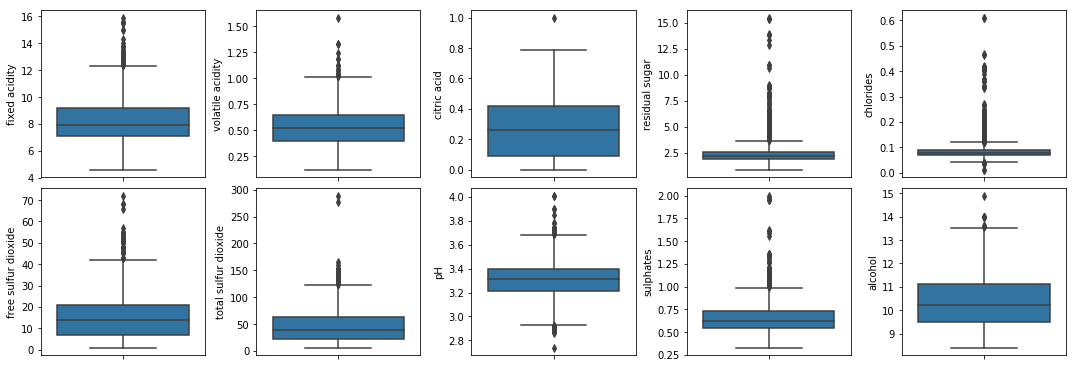

In [7]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in dataset.columns:
  if i != 'quality':
    sns.boxplot(y=i, data=dataset, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

From the above box plots we can clearly see that there are outliers in all features.

**BUT**

Here I am choosing not remove/modify outliers as we are looking for accuracy to minute levels, not just some approximation — high quality wine may have very rare composition (hence outlier) from other average quality wines, so we can not remove or modify outlier values in out dataset.

# **Feature Extraction**

Plotting bar plots to see relation between each independent feature with dependent feature 'Quality'

<function matplotlib.pyplot.show(*args, **kw)>

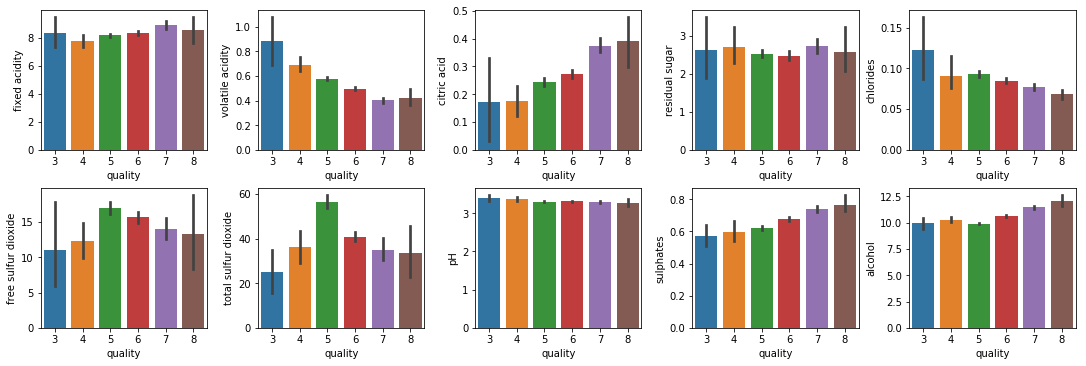

In [8]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index=0
for i in dataset.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=dataset, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

**From the above visualisation we derieve that:**
1. Features fixed acidity and residual sugar might not give any specification to classify/predict the quality.
2. Quality increases with
    * decrease in volatile acidity.
    * increase in citric acid.
    * decrease in chlorides.
    * decrease in pH.
    * increase in sulphates.
    * increase in alcohol.
3. Free sulfur dioxide alone will not be able to predict the quality.
4. Total sulfur dioxide alone will not be able to predict the quality.

**Plotting correlation heatmap to verify the above statements**




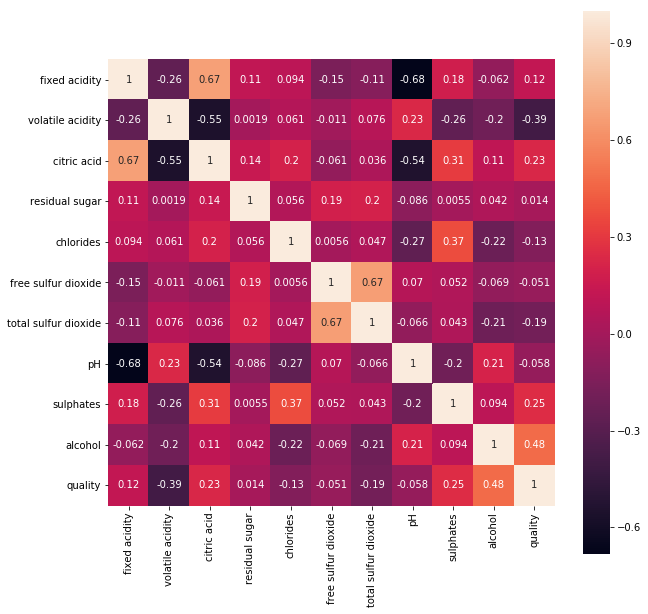

Correlation of different features of our dataset with quality:
fixed acidity : 0.1241
volatile acidity : -0.3906
citric acid : 0.2264
residual sugar : 0.0137
chlorides : -0.1289
free sulfur dioxide : -0.0507
total sulfur dioxide : -0.1851
pH : -0.0577
sulphates : 0.2514
alcohol : 0.4762
quality : 1.0000


In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(method='pearson'), annot=True, square=True)
plt.show()

print('Correlation of different features of our dataset with quality:')
for i in dataset.columns:
  corr, _ = pearsonr(dataset[i], dataset['quality'])
  print('%s : %.4f' %(i,corr))

In [10]:
#for a better view this way can be used
print('Another (more clear) view of correlations among features:\n')
dataset.corr().style.background_gradient(cmap="coolwarm")

Another (more clear) view of correlations among features:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1,-0.256131,0.671703,0.114777,0.0937052,-0.153794,-0.113181,-0.682978,0.183006,-0.0616683,0.124052
volatile acidity,-0.256131,1,-0.552496,0.00191788,0.0612978,-0.0105038,0.07647,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1,0.143577,0.203823,-0.0609781,0.035533,-0.541904,0.31277,0.109903,0.226373
residual sugar,0.114777,0.00191788,0.143577,1,0.0556095,0.187049,0.203028,-0.0856524,0.00552712,0.0420754,0.0137316
chlorides,0.0937052,0.0612978,0.203823,0.0556095,1,0.00556215,0.0474005,-0.265026,0.37126,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.0105038,-0.0609781,0.187049,0.00556215,1,0.667666,0.0703775,0.0516576,-0.0694084,-0.0506561
total sulfur dioxide,-0.113181,0.07647,0.035533,0.203028,0.0474005,0.667666,1,-0.0664946,0.0429468,-0.205654,-0.1851
pH,-0.682978,0.234937,-0.541904,-0.0856524,-0.265026,0.0703775,-0.0664946,1,-0.196648,0.205633,-0.0577314
sulphates,0.183006,-0.260987,0.31277,0.00552712,0.37126,0.0516576,0.0429468,-0.196648,1,0.0935948,0.251397
alcohol,-0.0616683,-0.202288,0.109903,0.0420754,-0.221141,-0.0694084,-0.205654,0.205633,0.0935948,1,0.476166


**From the above plots and values we can conclude:**
1. volatile acidity, chlorides and ph are negatively correlated to quality -- hence our statement was right that quality increases with decrease in value of these features; and vice versa for other features.
2. free sulfur dioxide and total sulfur dioxide are highly correlated to each other with correlation of 0.67.
3. There are many features with correlation < 0.5 to quality, and may be removed from the dataset.

BUT for the same reason as mentioned above in outlier section, that -- we are looking for accuracy to minute levels, not just some approximation — high quality wine may have very rare composition from other average quality wines, hence we need to take every feature in account while predicting quality of wine, so we can not remove or modify outlier values in out dataset.

# **Machine learning**

Now implementing classification algorithms based machine learning models and selecting the best out of them based on some score.

**First let's prepare our dataset for Machine Learning**

In [11]:
#our dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


Dividing quality of wine in two buckets, ie. Good wine and Bad wine, and on the basis of this we will give our final result.

In [12]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad


From the above code have divided the quality of wine in two buckets:
* Bad wine : range 2 - 6.5
* Good wine : range 6.5 - 8

This can be changed as per the requiremnt of our client.

Now we will map the values of bad and good to 0 and 1 respectively, as machine learning models can perform calculation only on numerical data.

In [13]:
dataset['quality'] = dataset['quality'].map({'bad' : 0, 'good' : 1})
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,3.35,0.80,10.5,0


Let's count and visualise the total number of different wine samples

0    1382
1     217
Name: quality, dtype: int64

Visualisation of accuracies of differnt classification models


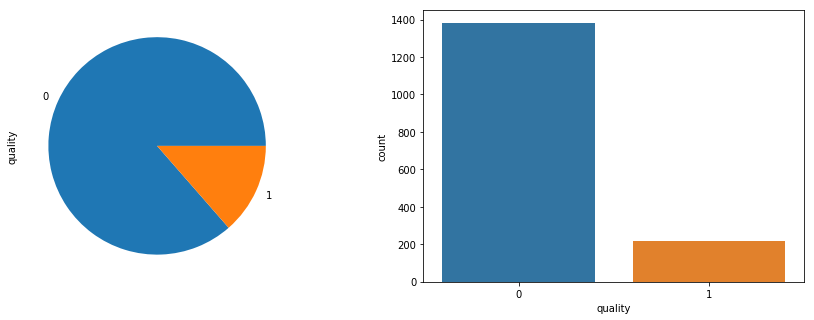

In [14]:
print(dataset['quality'].value_counts())
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax = ax.flatten()
print('\nVisualisation of accuracies of differnt classification models')
dataset['quality'].value_counts().plot(x=0, y=1, kind='pie', figsize=(15,5), ax=ax[0])
sns.countplot(dataset['quality'], ax=ax[1])
plt.show()

Creating set of independent and dependent features

In [15]:
X = dataset.iloc[:, :-1]
Y = (dataset.iloc[:, 10])

Creating traing and test set

In [16]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.20, random_state=0)

Feature scaling, but not scaling dependent variable as it has catagorical data

In [17]:
from sklearn.preprocessing import StandardScaler as ss
SS = ss()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

**Now implementing machine learning models**

Logistic Regression Classification

In [18]:
logisticRegression = LogisticRegression(solver='lbfgs', random_state=0)
logisticRegression.fit(X_train, Y_train)
Y_pred_logisticRegression = logisticRegression.predict(X_test)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_logisticRegression})
print(Y_compare_logisticRegression.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_logisticRegression))

     Actual  Predicted
1109      0          0
1032      0          0
1002      1          1
487       0          0
979       0          0

Confussion matrix:
[[276  14]
 [ 18  12]]


K-Nearest Neighbour Classification

In [19]:
knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_knn})
print(Y_compare_knn.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_knn))

     Actual  Predicted
1109      0          0
1032      0          0
1002      1          1
487       0          0
979       0          0

Confussion matrix:
[[280  10]
 [ 14  16]]


Support Vector Classification

In [20]:
svc = SVC(kernel='rbf', gamma='scale', random_state=0)
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
Y_compare_svc = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_svc})
print(Y_compare_svc.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_svc))

     Actual  Predicted
1109      0          0
1032      0          0
1002      1          1
487       0          0
979       0          0

Confussion matrix:
[[285   5]
 [ 21   9]]


Naive Bayes Calssification

In [21]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
Y_compare_nb = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_nb})
print(Y_compare_nb.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_nb))

     Actual  Predicted
1109      0          0
1032      0          0
1002      1          1
487       0          0
979       0          1

Confussion matrix:
[[241  49]
 [  7  23]]


Random Forrest Classification

In [22]:
rfc = RFC(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)
Y_compare_rfc = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_rfc})
print(Y_compare_rfc.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_rfc))

     Actual  Predicted
1109      0          0
1032      0          0
1002      1          1
487       0          0
979       0          0

Confussion matrix:
[[283   7]
 [  9  21]]


**Checking accuracy of different classification models**

In [23]:
#K-fold cross validation
modelNames = ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector', 'Naive Bayes', 'Random Forrest']
modelClassifiers = [logisticRegression, knn, svc, nb, rfc]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter=0
score=[]
for i in models['modelClassifiers']:
  accuracy = cross_val_score(i, X_train, Y_train, scoring='accuracy', cv=10)
  print('Accuracy of %s Classification model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
  score.append(accuracy.mean())
  counter+=1

Accuracy of Logistic Regression Classification model is 0.87
Accuracy of K-Nearest Neighbour Classification model is 0.87
Accuracy of Support Vector Classification model is 0.87
Accuracy of Naive Bayes Classification model is 0.83
Accuracy of Random Forrest Classification model is 0.90


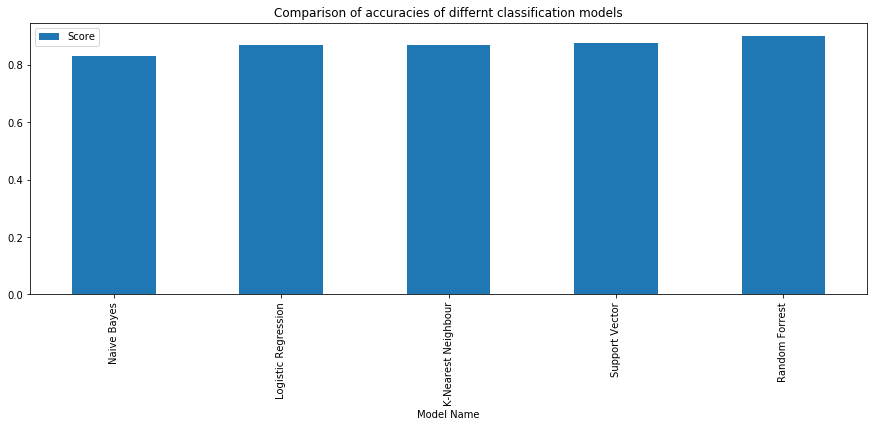

In [24]:
pd.DataFrame({'Model Name' : modelNames,'Score' : score}).sort_values(by='Score', ascending=True).plot(x=0, y=1, kind='bar', figsize=(15,5), title='Comparison of accuracies of differnt classification models')
plt.show()

From the above scores and visualiations we can conclude that Random Forrest Classification model gives the best score and we can use it to predict the quality of wine for this particular problem.

However other models like Logisgic Regression, KNN and SVC also have comparable score to Random Forrest and may also be used to predict quality of wine.

# **Final Summary**

From above data engineering and machine learning (classification) techniques we can conclude that:

1. We have chosen not to remove outliers and extract the more relavant features form out dataset - as we were looking for accuracy to minute levels, not just some approximation (high quality wine may have very rare composition from other average quality wines)
2. Random Forrest Classification model gave the best accuracy and can be considered as a good model for predictiong the quality of wine for this problem.
3. However other models like Logisgic Regression, KNN and SVC also have comparable score to Random Forrest and may also be used to predict quality of wine.
4. Naive Bayes model gave the least accuracy, which can be considered bad model to predict the quality of fine.
5. Performance tuning using methods like Grid Search, etc. can be done to improve the accuracy of these models. So, accuracy of these models will improve and we might get another best model for our problem.
6. We might(will) get different results if we remove outliers and consider feature extraction.

Finally I would like to end this notebook the fact, that no Data Science technique is perfect, there are many other ways/ models to get better results and there is always scope for imporvements.

**Please comment your suggestions**

**Please upvote if this notebook is helpful**